In [1]:
import numpy as np
import matplotlib.pyplot as plt

from kedro.extras.datasets.pickle import PickleDataSet

In [9]:
import os, sys
sys.path.append(os.path.abspath('../src'))

from tagseg.pipelines.data_processing.nodes import prepare_input
from tagseg.data.acdc_dataset import AcdcDataSet
from tagseg.data.utils import SimulateTags

In [3]:
dataset = PickleDataSet(filepath='../data/03_primary/acdc_train.pt').load()

In [52]:
eg = dataset[0][0].squeeze(0)
eg.shape

torch.Size([256, 256])

In [53]:
tagger = SimulateTags(
    label=dataset[0][1],
    myo_index=1
)

In [54]:
m, M = eg.min(), eg.max()
egg = ((eg - eg.min()) / (eg.max() - eg.min())) * 255

egg.min(), egg.max(), egg.shape

(tensor(0., dtype=torch.float64),
 tensor(255., dtype=torch.float64),
 torch.Size([256, 256]))

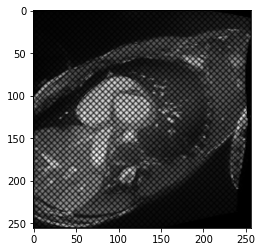

In [55]:
plt.imshow(tagger(egg), cmap='gray')

In [ ]:
transformation_params = dict(
    perform=True,
    generator_model='../data/06_models/netG_A2B.pth',
    batch_size=16
)

tagged = prepare_input(dataset, transformation_params)